<a href="https://colab.research.google.com/github/ojalgrover/STUDENT-OJAL/blob/main/Specialisation_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question 1**
**Create a pie chart which shows the proportion of male/female passengers.**

***(Only plot required)***




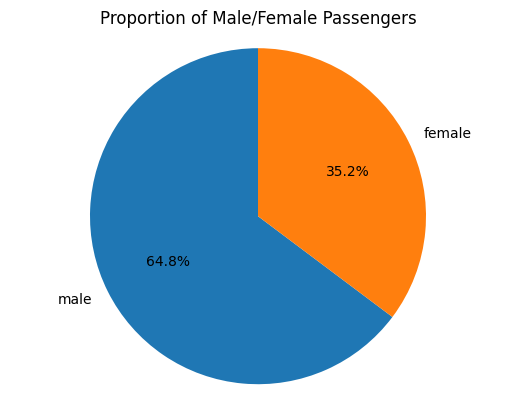

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

# Question 1: Create a pie chart which shows the proportion of male/female passengers
gender_count = titanic['sex'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Male/Female Passengers')
plt.show()




#**Question 2**
**Create a pie chart which shows the proportion of passengers in each class (1, 2, 3).**

***(Only plot required)***


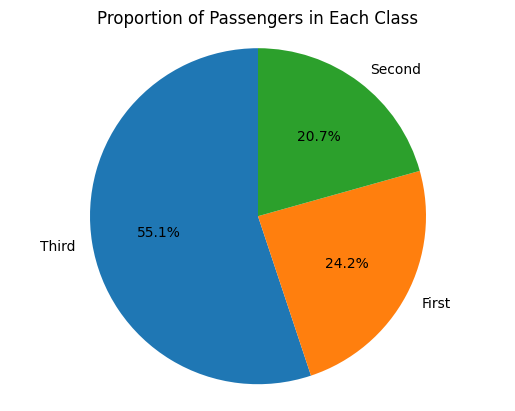

In [ ]:
# Question 2: Create a pie chart which shows the proportion of passengers in each class (1, 2, 3)
class_counts = titanic['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Passengers in Each Class')
plt.show()



#**Question 3**
**Explain the relationship between age and fare using a visualisation.**

***(Plot and interpretation required)***

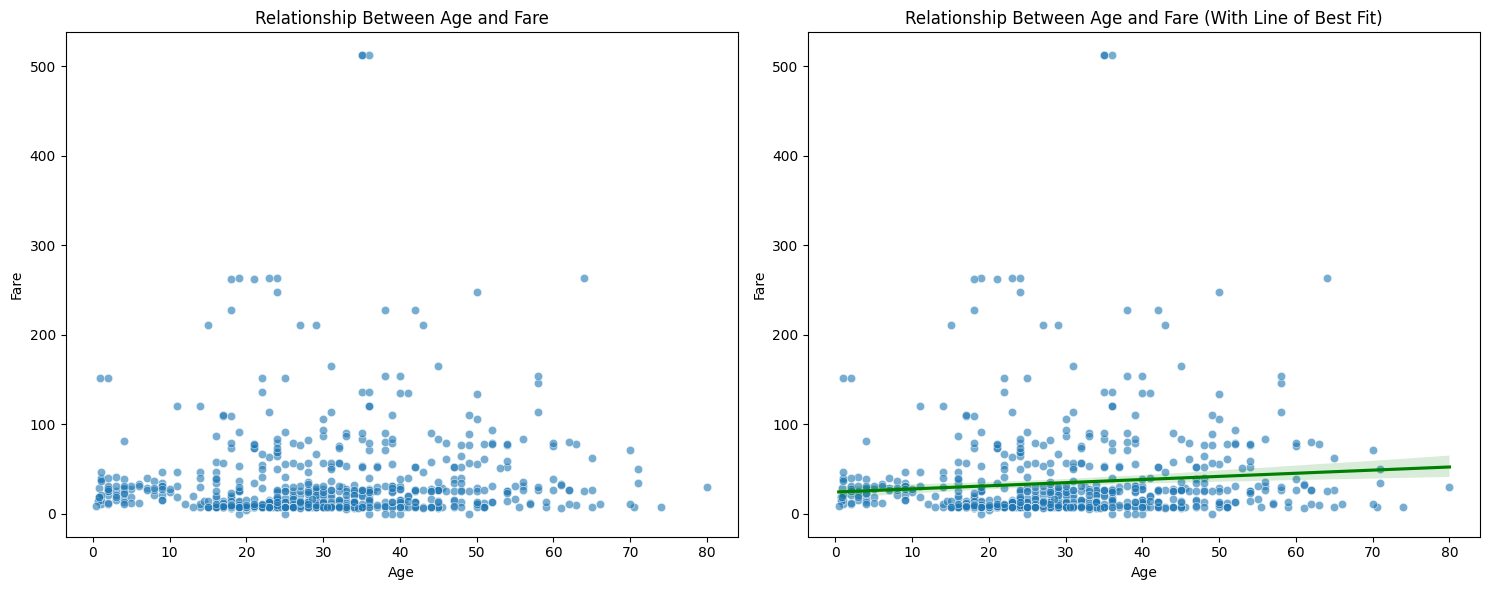

In [ ]:
# Question 3: Explain the relationship between age and fare using a visualisation.

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Left subplot: Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='fare', data=titanic, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship Between Age and Fare')

# Right subplot: Scatter plot with green line of best fit using Seaborn
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='fare', data=titanic, alpha=0.6)
sns.regplot(x='age', y='fare', data=titanic, scatter=False, color='green')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship Between Age and Fare (With Line of Best Fit)')

plt.tight_layout()
plt.show()


1. **Relationship:**
- In the left subplot, you see a scatter plot of age against fare. Each point represents a passenger's age and the corresponding fare they paid. The points are scattered across the plot without any clear trend or direction. This suggests that there is no strong linear relationship between age and fare in this view.
- In the right subplot, one can see a scatter plot of age against fare, similar to the left subplot. However, this time there is a green line of best fit added. The line of best fit provides a visual representation of the average trend in the data. The upward-sloping green line suggests a ***weak positive correlation*** between age and fare. This means that, on average, as age increases, the fare tends to increase slightly.
- While the best-fit line suggests a positive correlation between age and fare, the correlation might not be very strong. The points are spread out across the plot, indicating a considerable amount of variability in fare values for each age.

2. **Distribution:**
- There's a spread of points across different age groups and fare values, which suggests that there isn't a strict pattern of fare distribution based solely on age.
- The density of points is higher around lower fare values, possibly indicating and a standard fare or pricing tier that many passengers opted for, popular fare options and tiers.
-  Higher density in certain regions of the plot, around certain age groups: 0 - 10 and 14-45 years old. This suggests that there might be specific groups of passengers that paid similar fares and were of similar ages.
- The density of points varies within different age ranges, suggesting that fare preferences might differ among age groups.
- The distribution of fare values is right-skewed, meaning there are relatively few passengers who paid very high fares, but a larger number of passengers paid lower fares.

3. **Outliers:**
- There seem to be a few outlier points where passengers paid significantly higher fares than the majority. These outliers could represent exceptional cases, such as passengers who booked luxury tiers.
- Similarly, there are some outliers in the lower fare range, which could represent cases like discounts, promotions, or errors in recording fare information.

4. **Further Analysis:**
- To better understand the relationship, it might be useful to conduct additional analysis, such as calculating correlation coefficients, examining other variables such as ticket class and cabin location. The outliers represent unusual cases that don't conform to the general trend, and could provide insights into the different factors that influence fare beyond age.




#**Question 4**
**What is the survival ratio by age, sex, and class.**

***(Plot and interpretation required)***


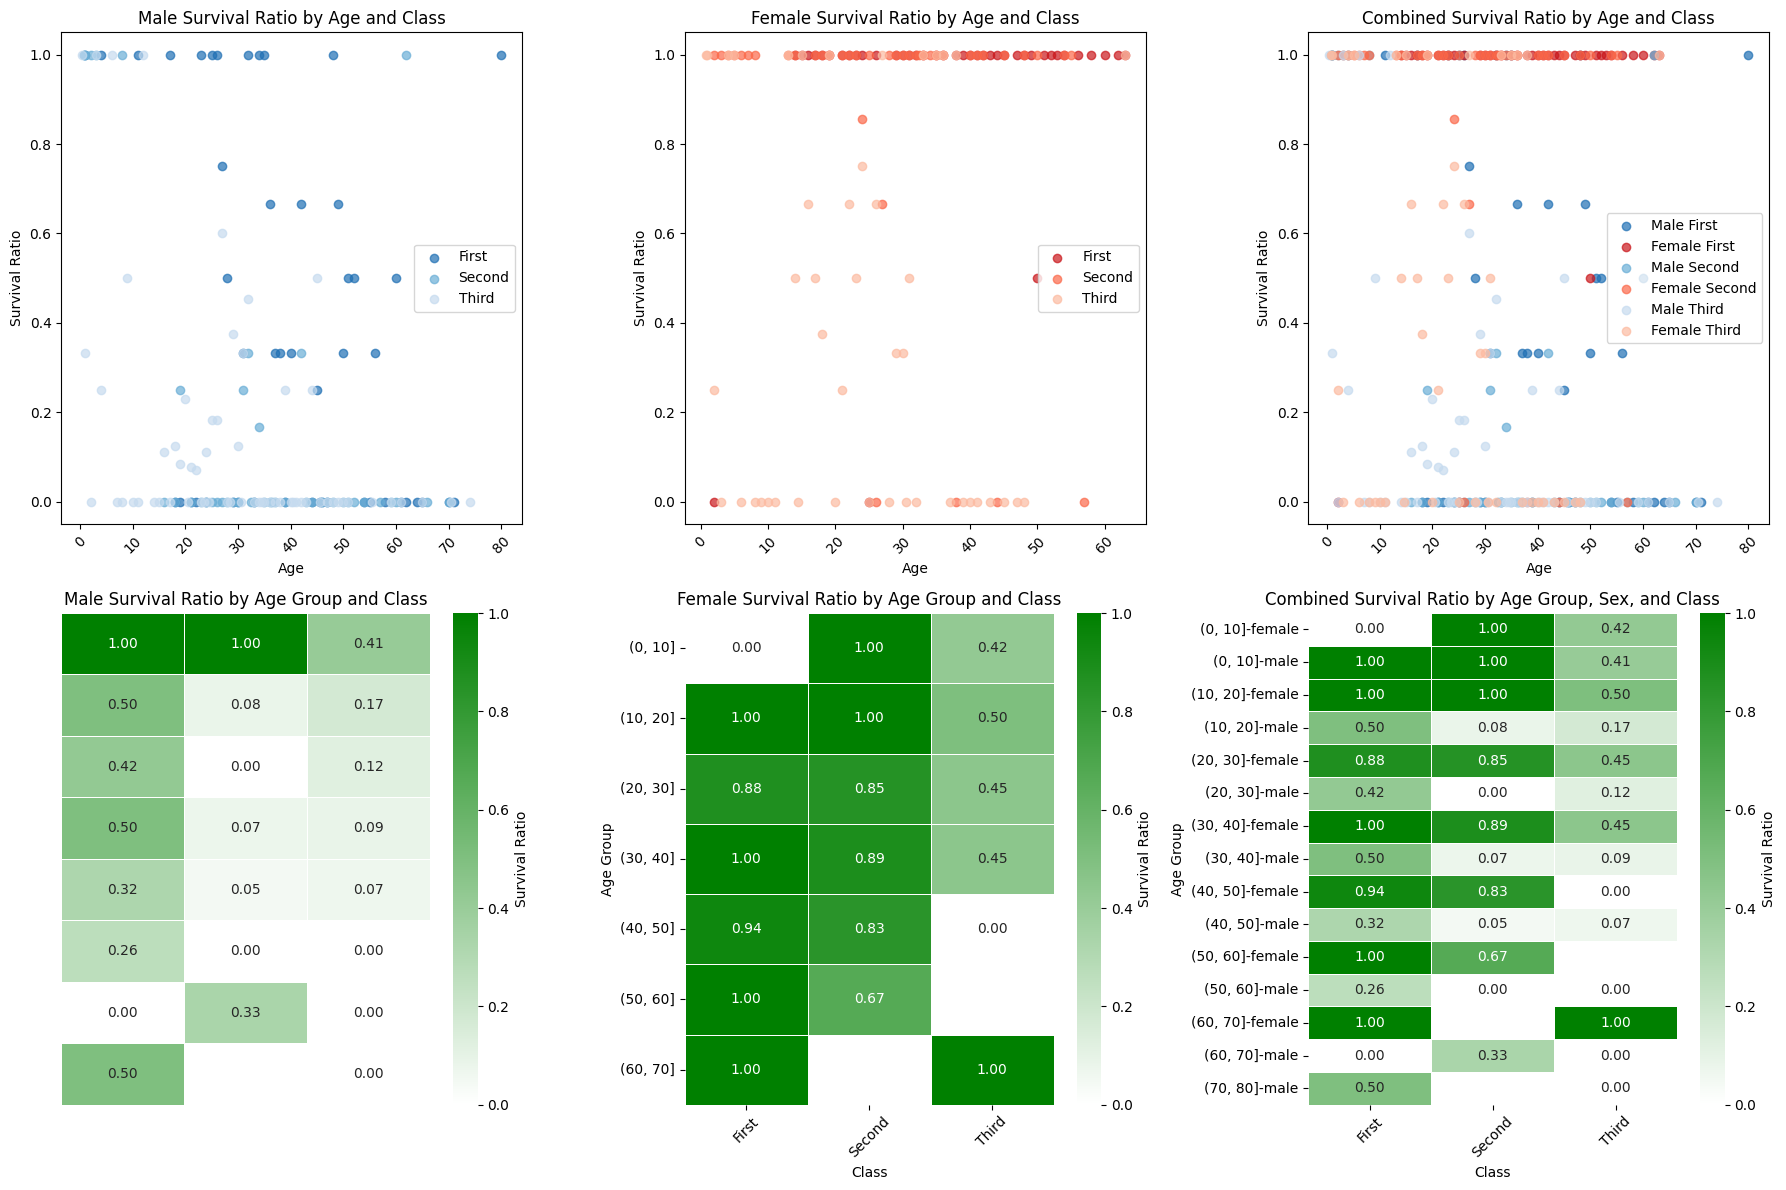

In [ ]:
# Question 4: What is the survival ratio by age, sex, and class.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create a custom white-to-green colormap
cmap_white_green = LinearSegmentedColormap.from_list("custom_white_green", [(1, 1, 1), (0, 0.5, 0)], N=256)

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

# Calculate survival ratio by age, sex, and class
survival_data = titanic.groupby(['age', 'sex', 'class'])['survived'].mean().reset_index()

# Define age bins
age_bins = np.arange(0, 81, 10)  # Age bins: 0-9, 10-19, 20-29, ...

# Categorize ages into bins
survival_data['age_bin'] = pd.cut(survival_data['age'], bins=age_bins)

plt.figure(figsize=(18, 12))

# Define reversed color palettes for the different classes
class_colors = list(reversed(sns.color_palette("Blues", n_colors=3)))
female_class_colors = list(reversed(sns.color_palette("Reds", n_colors=3)))

# Scatter Plots for Male Survival Ratio by Age and Class (using reversed Blues palette)
plt.subplot(231)
male_data = survival_data[survival_data['sex'] == 'male']
for i, cls in enumerate(['First', 'Second', 'Third']):
    subset = male_data[male_data['class'] == cls]
    plt.scatter(x='age', y='survived', data=subset, c=[class_colors[i]], label=cls, alpha=0.7)
plt.title('Male Survival Ratio by Age and Class')
plt.xlabel('Age')
plt.ylabel('Survival Ratio')
plt.xticks(rotation=45)
plt.legend()

# Scatter Plots for Female Survival Ratio by Age and Class (using reversed Reds palette)
plt.subplot(232)
female_data = survival_data[survival_data['sex'] == 'female']
for i, cls in enumerate(['First', 'Second', 'Third']):
    subset = female_data[female_data['class'] == cls]
    plt.scatter(x='age', y='survived', data=subset, c=[female_class_colors[i]], label=cls, alpha=0.7)
plt.title('Female Survival Ratio by Age and Class')
plt.xlabel('Age')
plt.ylabel('Survival Ratio')
plt.xticks(rotation=45)
plt.legend()

# Combined Scatter Plot for Survival Ratio by Age, Sex and Class with a single legend
plt.subplot(233)
for i, cls in enumerate(['First', 'Second', 'Third']):
    male_subset = male_data[male_data['class'] == cls]
    female_subset = female_data[female_data['class'] == cls]

    plt.scatter(x='age', y='survived', data=male_subset, c=[class_colors[i]], label=f'Male {cls}', alpha=0.7)
    plt.scatter(x='age', y='survived', data=female_subset, c=[female_class_colors[i]], label=f'Female {cls}', alpha=0.7)

plt.title('Combined Survival Ratio by Age, Sex and Class')
plt.xlabel('Age')
plt.ylabel('Survival Ratio')
plt.xticks(rotation=45)
plt.legend()

# Create a 2x3 grid of subplots for heatmaps
grid = plt.GridSpec(2, 3, width_ratios=[1, 1, 1])
# Create some vertical space between the scatter plots and heatmaps
plt.subplot(grid[3])
plt.axis('off')  # Turn off axis for empty subplot

# Plot for Male Survival Ratio heatmap
plt.subplot(grid[3])
sns.heatmap(pivot_table.xs('male', level=1), cmap=cmap_white_green, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Survival Ratio'})
plt.title('Male Survival Ratio by Age Group and Class')
plt.xlabel('Class')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Plot for Female Survival Ratio heatmap
plt.subplot(grid[4])
sns.heatmap(pivot_table.xs('female', level=1), cmap=cmap_white_green, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Survival Ratio'})
plt.title('Female Survival Ratio by Age Group and Class')
plt.xlabel('Class')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Plot for Combined Survival Ratio heatmap
plt.subplot(grid[5])
sns.heatmap(pivot_table, cmap=cmap_white_green, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Survival Ratio'})
plt.title('Combined Survival Ratio by Age Group, Sex, and Class')
plt.xlabel('Class')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


The series of visualizations provides insights into the survival ratios of passengers on the Titanic based on their age, sex, and class. These insights help us understand how different factors influenced the likelihood of survival.

1. **Scatter Plots for Survival Ratios by Age and Class**
- **Male and Female Survival Ratios**
  - The scatter plots reveal the survival ratios of passengers in different classes based on their ages. Neither the scatter plot for male passengers nor for female passengers shows a clear linear trend. This suggests that within individual classes, age alone doesn't strongly determine survival ratios. The data points are dispersed, indicating that while age might have had an effect, it wasn't the sole factor influencing survival.
  - While both scatter plots show variability, female survival ratios appear to be generally higher across different age groups and classes compared to male survival ratios.

- **Combined Scatter Plot for Survival Ratios by Age and Class:**
   - The combined scatter plot provides a broader perspective by showcasing the survival ratios of both male and female passengers in the same plot. Here, we observe variations in survival ratios across classes and genders. However, similar to the individual scatter plots, no distinct linear relationship is apparent between age and survival ratios. Instead, this visualisation shows the complex interplay between age, gender, class, and survival.
   - When male and female survival ratios are combined, the overall trend shows that females tend to have higher survival ratios across classes and age groups.

2. **Heatmaps for Survival Ratios by Age Group and Class (Male and Female):**
   The heatmaps offer a structured view of survival ratios based on age groups, sex, and class. These heatmaps highlight specific patterns within different segments of the dataset:

   - **Male Survival Ratios by Age Group and Class:** The heatmap suggests that, across all classes, survival ratios are higher for male passengers in the age group 0-10 years old. The "Second" and "Third" classes, in particular, show a dip in survival ratios in the age group 10-20 years.
   
   - **Female Survival Ratios by Age Group and Class:** Similar to males, female passengers in the age group 0-10 have higher survival ratios across all classes. The "First" class displays consistent high survival ratios in various age groups.
   
   - **Combined Survival Ratios by Age Group, Sex, and Class:** This heatmap amalgamates the data for males and females and  reinforces the observation that female survival ratios are higher than male survival ratios, and especially in the age group 0-10 years, are consistently higher across various classes. Also, the "First" class stands out as having generally higher survival ratios.

**Interpretation Summary:**

The visualizations collectively suggest that while age, sex, and class influenced survival ratios, the relationship is not straightforward. Age alone doesn't consistently dictate higher survival ratios. Instead, other factors such as class and sex play integral roles.